In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

mnist = datasets.load_digits()
x = mnist.data
y = mnist.target

print(x.shape)

(1797, 64)


**1. PCA**

In [75]:
from sklearn.decomposition import PCA

Text(0.5, 0, 'Components')

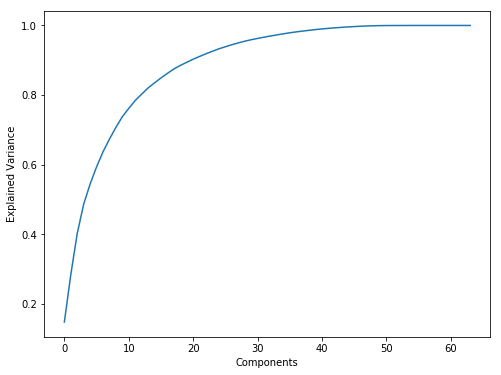

In [76]:
pca = PCA()
x_pca = pca.fit_transform(x)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')

A. I'm choosing to use 40 components because that controls for almost all of the variance.

Text(0.5, 1.0, 'First 2 Principle Components')

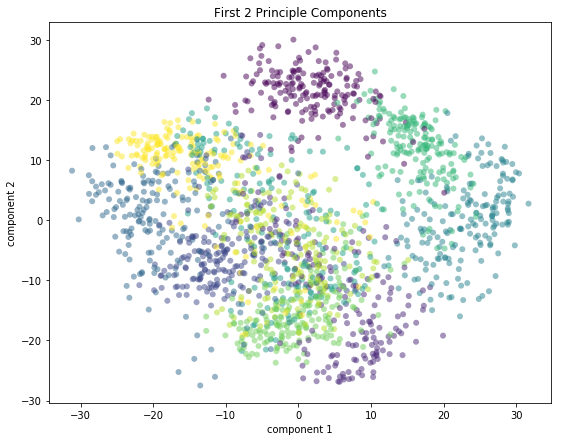

In [77]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(x)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

B. The purple looks to be pretty condensed at the top and bottom of the plot. The other colors are more scattered.

C. PCA is used to reduce dimensionality in the data. It accomplishes this by dropping the the axes with the lowest variance. I guess the drawback would be that it isn't necessary. For models like KNN it would be helpful since dimensionality can ruin a KNN model. But in general most models and algrithms don't need reduced dimensionality.

**2. TSNE**

In [78]:
from sklearn.manifold import TSNE

#Reduce Dimensionality Before Feeding In
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)

rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.639315
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.727184
[t-SNE] KL divergence after 1000 iterations: 0.686611


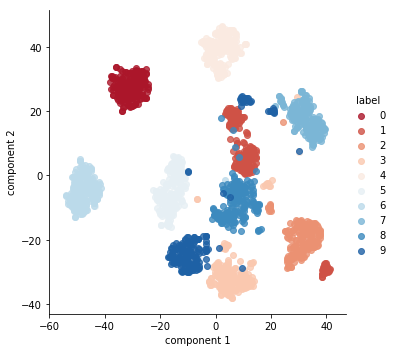

In [79]:
df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

A. This plot is way tighter than the PCA used above. Each cluster is prtty much on it's own.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.261s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 6.719962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.058838
[t-SNE] KL divergence after 1000 iterations: 0.884663


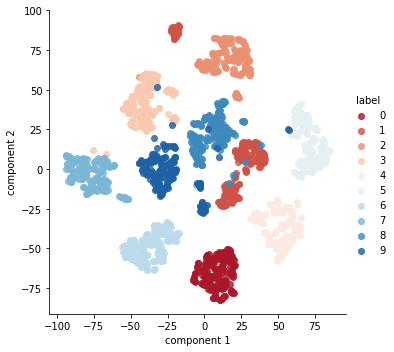

In [80]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.227s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.291725
[t-SNE] KL divergence after 1000 iterations: 0.927398


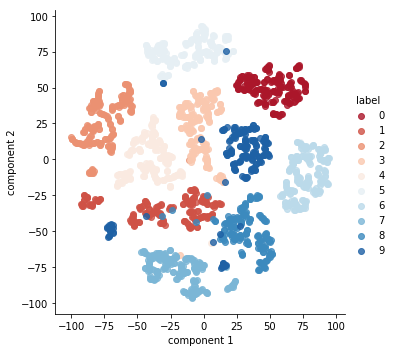

In [81]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

B. Reducing perplexity makes the clusters seperate and become less tight.

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.257843
[t-SNE] KL divergence after 300 iterations: 1.796355


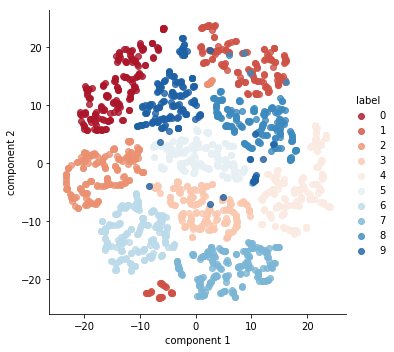

In [82]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.851234
[t-SNE] KL divergence after 1000 iterations: 1.067734


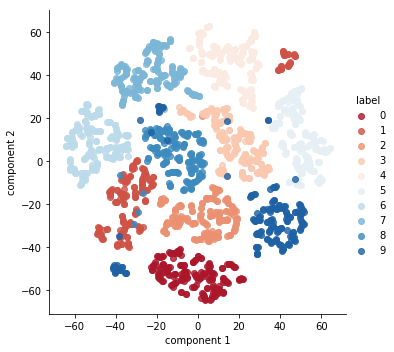

In [83]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=10)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

C. There were minimal changes with variation in the learning rate. Looks like the model is pretty robust in that sense.

**3. K-Means Clustering**

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [85]:
kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(x)
labels = kmeans.labels_
silhouette_score(x, labels, metric='euclidean')

0.18247906918584123

A. After doing some research using Google, it looks like 10 is the ideal value for k.

B. Used the Silhouette Score to evaluate my model.

C. Below

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121140
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.797619
[t-SNE] KL divergence after 1000 iterations: 0.761991


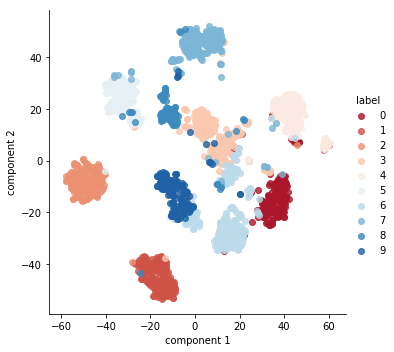

In [86]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='component 1', y='component 2', data=df_tsne, hue='label', palette = 'RdBu', fit_reg=False)

D. I did not scale my data.

E. Overall it looks pretty robust, it is in distinct little groups but the colors are more mixed than the previous models.

**4. Hierarchical Clustering**

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
x_cluster = x[:100]

A.

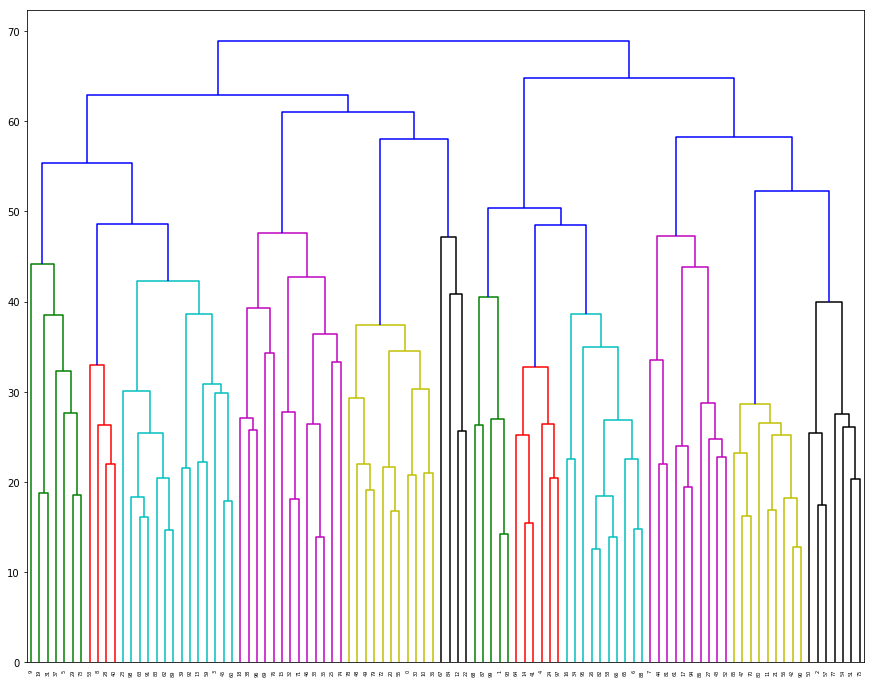

In [89]:
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)

B. Looks like there are about 15 clusters.

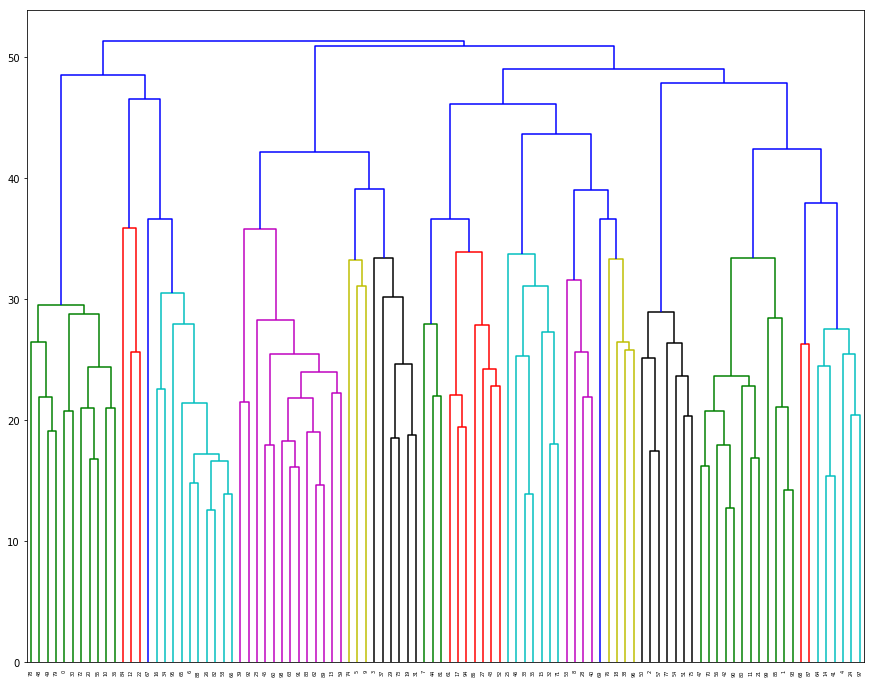

In [90]:
Z = linkage(x_cluster, 'average')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)

C. Comapred linkage looks like it has less clusters than average linkage. Complete makes connections later than average did.